In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.stats.mstats import winsorize

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
blood_pressure = pd.read_csv('C:/Users/chowd/Documents/NEU/3rd quarter/Data Mining Applications/Final_Project/Final_Project/blood_pressure_cleaned.csv', encoding='Windows-1252')

In [61]:
blood_pressure.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,201.5,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


In [62]:
blood_pressure.shape

(2000, 15)

In [63]:
blood_pressure.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.099500,0.509500,25254.424500,24926.097000,249.751215,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.284944,17.107832,11.761208,0.500109,0.299407,0.500035,14015.439623,14211.692586,135.161221,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.250000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,144.000000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.494817,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,245.775000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.730000,62.000000,40.000000,1.000000,0.000000,1.000000,37382.250000,36839.750000,360.250000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


In [64]:
blood_pressure.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

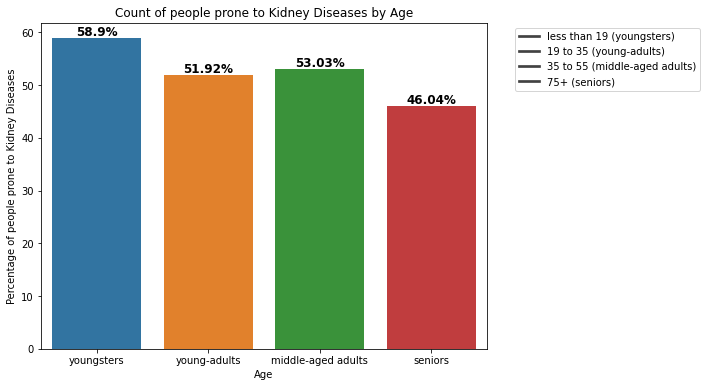

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert age to int and drop missing values
blood_pressure.dropna(subset=['Age'], inplace=True)
blood_pressure['Age'] = blood_pressure['Age'].astype(int)

# Divide age into bins
blood_pressure['AgeBins'] = pd.cut(blood_pressure['Age'], bins=[0, 19, 35, 55, max(blood_pressure['Age'])], labels=['youngsters', 'young-adults', 'middle-aged adults', 'seniors'])

# Calculate survival count and percentage for each age bin
disease = blood_pressure.groupby('AgeBins')['Chronic_kidney_disease'].agg(['sum', 'count']).reset_index()
disease['Percentage'] = round(disease['sum'] / disease['count'] * 100, 2).astype(float)  # Convert to float

plt.figure(figsize=(8, 6))
# Create bar plot
sns.barplot(x='AgeBins', y='Percentage', data=disease)
plt.title('Count of people prone to Kidney Diseases by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of people prone to Kidney Diseases')

# Adjust legend position
plt.legend(labels=['less than 19 (youngsters)', '19 to 35 (young-adults)', '35 to 55 (middle-aged adults)', f'{max(blood_pressure["Age"])}+ (seniors)'],
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on the bars
for i, v in enumerate(disease['Percentage']):
    plt.text(i, disease['Percentage'][i], f'{v}%', fontsize=12, fontweight='bold', ha='center', va='bottom')

plt.show()

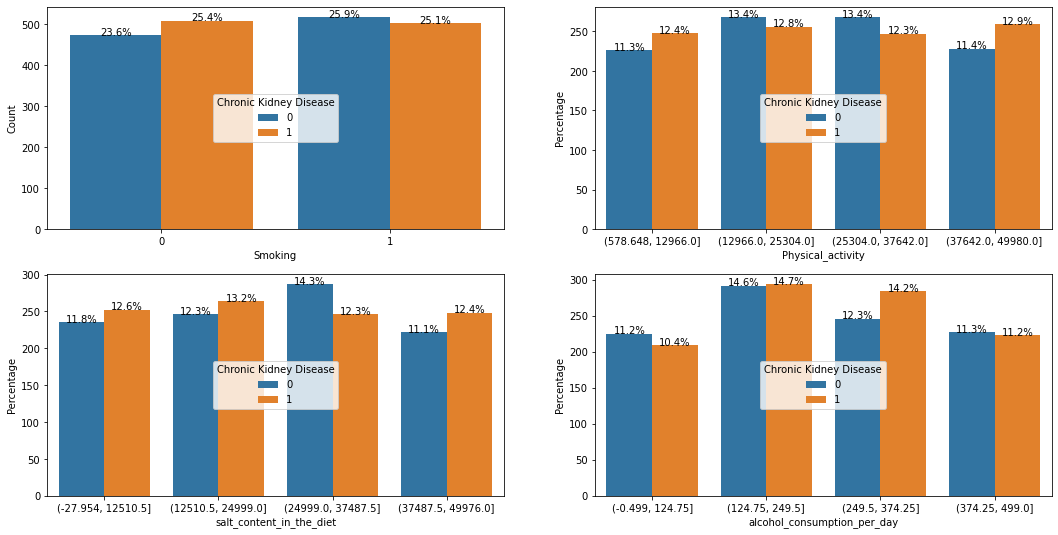

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

# Plot the count of prone to kidney diseases for binary variables
sns.countplot(x='Smoking', hue='Chronic_kidney_disease', data=blood_pressure, ax=axs[0, 0])
axs[0, 0].set_xlabel('Smoking')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend(loc='center', title='Chronic Kidney Disease')
# Add text labels with percentage on top of each bar
total = len(blood_pressure)
for p in axs[0, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[0, 0].annotate(percentage, (x, y), ha='center')

# Create bins for physical activity
blood_pressure['Physical_activity_bins'] = pd.cut(blood_pressure['Physical_activity'], bins=4)

# Plot the count of prone to kidney diseases for physical activity bins
sns.countplot(x='Physical_activity_bins', hue='Chronic_kidney_disease', data=blood_pressure, ax=axs[0, 1])
axs[0, 1].set_xlabel('Physical_activity')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].legend(loc='center', title='Chronic Kidney Disease')

# Add text labels with percentage on top of each bar
total = len(blood_pressure)
for p in axs[0, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[0, 1].annotate(percentage, (x, y), ha='center')

# Create bins for Salt content activity
blood_pressure['salt_content_bins'] = pd.cut(blood_pressure['salt_content_in_the_diet'], bins=4)

sns.countplot(x='salt_content_bins', hue='Chronic_kidney_disease', data=blood_pressure, ax=axs[1, 0])
axs[1, 0].set_xlabel('salt_content_in_the_diet')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].legend(loc='center', title='Chronic Kidney Disease')


# Add text labels with percentage on top of each bar
total = len(blood_pressure)
for p in axs[1, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1, 0].annotate(percentage, (x, y), ha='center')

# Plot the distribution of alcohol_consumption_per_day using bins
blood_pressure['alcohol_bins'] = pd.cut(blood_pressure['alcohol_consumption_per_day'], bins=4)

sns.countplot(x='alcohol_bins', hue='Chronic_kidney_disease', data=blood_pressure, ax=axs[1, 1])
axs[1, 1].set_xlabel('alcohol_consumption_per_day')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].legend(loc='center', title='Chronic Kidney Disease')


# Add text labels with percentage on top of each bar
total = len(blood_pressure)
for p in axs[1, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1, 1].annotate(percentage, (x, y), ha='center')

# Remove the unnecessary variables
blood_pressure.drop(['Physical_activity_bins', 'salt_content_bins', 'alcohol_bins'], axis=1, inplace=True)

plt.show()

C:\Users\chowd\AppData\Local\Temp\ipykernel_1896\1025758203.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros(blood_pressure.corr().shape, dtype=bool)
C:\Users\chowd\AppData\Local\Temp\ipykernel_1896\1025758203.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(blood_pressure.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='hot', mask=mask)


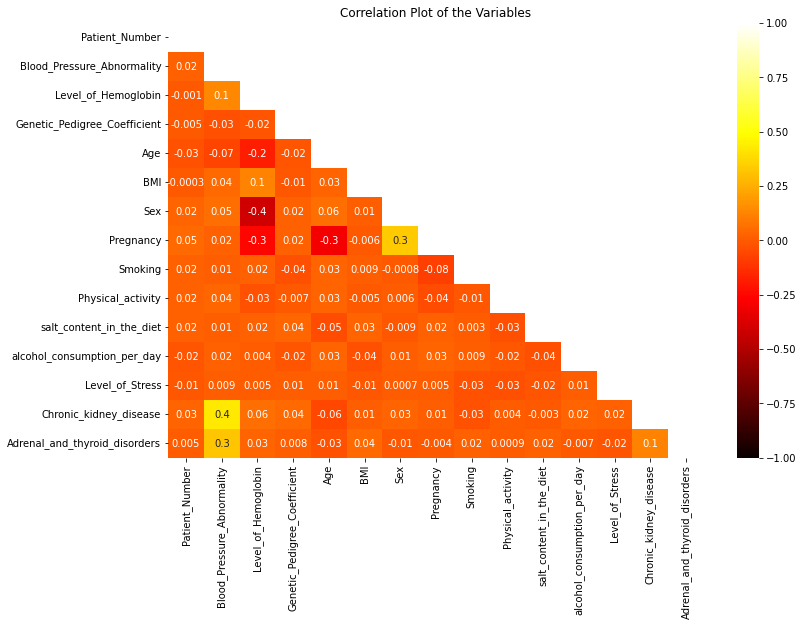

In [67]:
# Draw the heatmap 
plt.figure(figsize=(12, 8))
mask = np.zeros(blood_pressure.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.title('Correlation Plot of the Variables')
sns.heatmap(blood_pressure.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='hot', mask=mask)
plt.show()

In [68]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Separate the target variable and the predictors
y = blood_pressure['Chronic_kidney_disease']
X = blood_pressure.drop(['Chronic_kidney_disease', 'Patient_Number', 'AgeBins'], axis=1)

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.594314
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     Chronic_kidney_disease   No. Observations:                 2000
Model:                              Logit   Df Residuals:                     1986
Method:                               MLE   Df Model:                           13
Date:                    Sun, 07 May 2023   Pseudo R-squ.:                  0.1425
Time:                            09:11:39   Log-Likelihood:                -1188.6
converged:                           True   LL-Null:                       -1386.2
Covariance Type:                nonrobust   LLR p-value:                 2.384e-76
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.66

In [69]:
blood_pressure.drop(columns='AgeBins', inplace=True)

In [70]:
blood_pressure.drop(columns='Patient_Number', inplace=True)

In [71]:
from sklearn.metrics import pairwise_distances
import pandas as pd
import gower

# Assuming you have the 'german_credit_clean' DataFrame loaded

# Calculate Gower dissimilarity matrix
gower_df = pd.DataFrame(gower.gower_matrix(blood_pressure), columns=blood_pressure.index, index=blood_pressure.index)

C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

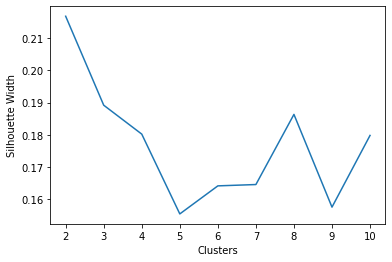

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette = []
silhouette.append(np.nan)

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(gower_df)
    labels = kmeans.labels_
    silhouette_width = silhouette_score(gower_df, labels, metric='precomputed')
    silhouette.append(silhouette_width)

# Plot silhouette widths
plt.plot(range(1, 11), silhouette)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Width')
plt.show()

In [77]:
from pyclustering.cluster.kmedoids import kmedoids

# Assuming you have the 'gower_df' dissimilarity matrix and 'german_credit_clean' DataFrame loaded

# Convert dissimilarity matrix to a list of lists
dissimilarity_matrix = gower_df.values.tolist()

# Create an instance of the KMedoids model
pam_german = kmedoids(dissimilarity_matrix, initial_index_medoids=[0, 1])

# Run the PAM clustering algorithm
pam_german.process()

# Get the medoid indices for the clusters
medoid_indices = pam_german.get_medoids()

# Get the medoid data points from the original DataFrame
medoid_data_points = blood_pressure.iloc[medoid_indices]

# Print the medoid data points
print(medoid_data_points)

      Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
407                            1                14.71   
1422                           0                14.34   

      Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
407                           0.46   37   38    1        0.0        1   
1422                          0.56   50   29    1        0.0        0   

      Physical_activity  salt_content_in_the_diet  \
407               15358                     33663   
1422               9608                      9133   

      alcohol_consumption_per_day  Level_of_Stress  Chronic_kidney_disease  \
407                         496.0                2                       1   
1422                        108.0                2                       0   

      Adrenal_and_thyroid_disorders  
407                               1  
1422                              0  


In [78]:
from pyclustering.cluster.kmedoids import kmedoids

# Assuming you have the 'gower_df' dissimilarity matrix and 'german_credit_clean' DataFrame loaded

# Convert dissimilarity matrix to a list of lists
dissimilarity_matrix = gower_df.values.tolist()

# Create an instance of the KMedoids model
pam_german = kmedoids(dissimilarity_matrix, initial_index_medoids=[0, 1, 2, 3])

# Run the PAM clustering algorithm
pam_german.process()

# Get the medoid indices for the clusters
medoid_indices = pam_german.get_medoids()

# Get the medoid data points from the original DataFrame
medoid_data_points = blood_pressure.iloc[medoid_indices]

# Print the medoid data points
print(medoid_data_points)

      Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
710                            1                 8.58   
1422                           0                14.34   
1970                           1                11.26   
263                            0                11.54   

      Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
710                           0.00   42   28    1        0.0        1   
1422                          0.56   50   29    1        0.0        0   
1970                          0.89   33   50    0        0.0        0   
263                           0.39   65   27    0        0.0        1   

      Physical_activity  salt_content_in_the_diet  \
710               22897                      2658   
1422               9608                      9133   
1970              36238                     20002   
263                1486                     14081   

      alcohol_consumption_per_day  Level_of_Stress  Chronic_kidney_disease  \
710 

In [101]:
import pandas as pd

# Assuming the given output is stored in a DataFrame named 'cluster_summary'
# Extract the target variable column from the cluster_summary DataFrame
target_variable = medoid_data_points['Chronic_kidney_disease']

# Find the clusters with the highest and lowest target variable values
cluster_with_highest_target = target_variable.idxmax()
cluster_with_lowest_target = target_variable.idxmin()

# Compare the feature values between the clusters with the highest and lowest target values
features_of_interest = ['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
                        	'Sex', 'Pregnancy', 'Smoking', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day',
                                	'Level_of_Stress', 'Adrenal_and_thyroid_disorders']
# Select the features you want to examine

# Calculate the mean values for the selected features in the cluster with the highest target value
highest_target_values = medoid_data_points.loc[cluster_with_highest_target, features_of_interest]

# Calculate the mean values for the selected features in the cluster with the lowest target value
lowest_target_values = medoid_data_points.loc[cluster_with_lowest_target, features_of_interest]

# Display the comparison of feature values
feature_comparison = pd.concat([highest_target_values, lowest_target_values], axis=1)
feature_comparison.columns = ['Highest Target Cluster', 'Lowest Target Cluster']
print("Feature values in clusters with highest and lowest target values:")
print(feature_comparison)

Feature values in clusters with highest and lowest target values:
                               Highest Target Cluster  Lowest Target Cluster
Blood_Pressure_Abnormality                       1.00                   0.00
Level_of_Hemoglobin                              8.58                  14.34
Genetic_Pedigree_Coefficient                     0.00                   0.56
Age                                             42.00                  50.00
BMI                                             28.00                  29.00
Sex                                              1.00                   1.00
Pregnancy                                        0.00                   0.00
Smoking                                          1.00                   0.00
Physical_activity                            22897.00                9608.00
salt_content_in_the_diet                      2658.00                9133.00
alcohol_consumption_per_day                    460.00                 108.00
Level_of_S

In [183]:
from sklearn.linear_model import Lasso

# Create a LASSO regression model
y = blood_pressure['Chronic_kidney_disease']
X = blood_pressure.drop(['Chronic_kidney_disease'], axis=1)
lasso_model = Lasso(alpha=0.001)  # You can adjust the value of alpha

# Fit the LASSO model to the data
lasso_model.fit(X, y)

# Get the feature scores
feature_scores = lasso_model.coef_

# Display the scores for each feature
for feature, score in zip(X.columns, feature_scores):
    print(f"{feature}: {score}")

Blood_Pressure_Abnormality: 0.430976503379314
Level_of_Hemoglobin: -0.0019710716311299335
Genetic_Pedigree_Coefficient: 0.08188748722103761
Age: -0.000908767118922499
BMI: -3.6506985361434854e-05
Sex: 0.0
Pregnancy: -0.006295635113869696
Smoking: -0.023847182565956696
Physical_activity: -4.1868995417612376e-07
salt_content_in_the_diet: -3.901441223314223e-07
alcohol_consumption_per_day: 5.979064552758874e-05
Level_of_Stress: 0.0063331860869653206
Adrenal_and_thyroid_disorders: -0.01443175999081952


In [140]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Split the data into independent variables (X) and the target variable (y)
X = blood_pressure.drop('Chronic_kidney_disease', axis=1)
y = blood_pressure['Chronic_kidney_disease']

# Forward Stepwise Selection
def forward_stepwise_selection(X, y):
    selected_features = []
    best_model = None
    best_aic = np.inf

    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        if not remaining_features:
            break

        best_aic_local = np.inf
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = sm.add_constant(X[current_features])
            model = sm.Logit(y, X_subset)
            result = model.fit(disp=0)
            aic = result.aic
            if aic < best_aic_local:
                best_aic_local = aic
                best_feature = feature
                best_model = result

        if best_aic_local < best_aic:
            selected_features.append(best_feature)
            best_aic = best_aic_local
        else:
            break

    return selected_features, best_model

# Backward Stepwise Selection
def backward_stepwise_selection(X, y):
    selected_features = X.columns.tolist()
    best_model = None
    best_aic = np.inf

    while True:
        if len(selected_features) == 0:
            break

        best_aic_local = np.inf
        best_feature = None

        for feature in selected_features:
            remaining_features = list(set(selected_features) - set([feature]))
            X_subset = sm.add_constant(X[remaining_features])
            model = sm.Logit(y, X_subset)
            result = model.fit(disp=0)
            aic = result.aic
            if aic < best_aic_local:
                best_aic_local = aic
                best_feature = feature
                best_model = result

        if best_aic_local < best_aic:
            selected_features.remove(best_feature)
            best_aic = best_aic_local
        else:
            break

    return selected_features, best_model

# Perform forward stepwise selection
forward_selected_features, forward_best_model = forward_stepwise_selection(X, y)
print("Forward Selected Features:", forward_selected_features)
print("Forward Best Model AIC:", forward_best_model.aic)

# Perform backward stepwise selection
backward_selected_features, backward_best_model = backward_stepwise_selection(X, y)
print("Backward Selected Features:", backward_selected_features)
print("Backward Best Model AIC:", backward_best_model.aic)

Forward Selected Features: ['Blood_Pressure_Abnormality', 'Genetic_Pedigree_Coefficient', 'Smoking']
Forward Best Model AIC: 2390.507250982887
Backward Selected Features: ['Blood_Pressure_Abnormality', 'Genetic_Pedigree_Coefficient', 'Smoking']
Backward Best Model AIC: 2390.3096062794107


In [122]:
clusters = pam_german.get_clusters()

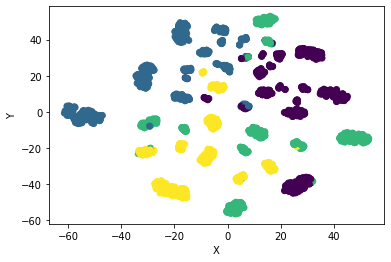

In [96]:
import pandas as pd
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids
import matplotlib.pyplot as plt

# Assuming you have already loaded the gower_df and pam_german data frames

# Perform K-Medoids clustering
k = 4  # Replace 4 with the desired number of clusters
initial_medoids = [0, 1, 2, 3]  # Replace with your initial medoid indices
kmedoids_instance = kmedoids(gower_df, initial_medoids)
kmedoids_instance.process()
cluster_labels = kmedoids_instance.get_clusters()

# Perform t-SNE dimensionality reduction
tsne = TSNE()
tsne_array = tsne.fit_transform(gower_df)

# Create a data frame for t-SNE results
tsne_df = pd.DataFrame(tsne_array, columns=["X", "Y"])
tsne_df["cluster"] = pd.Series([None] * len(tsne_df))

# Assign cluster labels to each point in the t-SNE space
for cluster_id, indices in enumerate(cluster_labels):
    tsne_df.loc[indices, "cluster"] = cluster_id

# Plot the t-SNE results
plt.scatter(x=tsne_df["X"], y=tsne_df["Y"], c=tsne_df["cluster"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [150]:
import pandas as pd

# Select the desired columns from the original dataset
selected_columns = ["Blood_Pressure_Abnormality", "Genetic_Pedigree_Coefficient", "Age", "BMI",
                    "Smoking", "Physical_activity", "salt_content_in_the_diet",
                    "alcohol_consumption_per_day", "Adrenal_and_thyroid_disorders", "Chronic_kidney_disease"]

# Create a new DataFrame with the selected columns
bp_modeling = blood_pressure[selected_columns].copy()

In [151]:
# Split the dataset into training and testing sets
X = bp_modeling.drop('Chronic_kidney_disease', axis=1)
y = bp_modeling['Chronic_kidney_disease']

In [152]:
from sklearn.preprocessing import StandardScaler

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

In [201]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
#Hyperparameters
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Create the RandomForestClassifier model
rfc = RandomForestClassifier()

# Perform grid search with cross-validation
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, verbose=True, n_jobs=4)
CV_rfc.fit(X_train, y_train)

# Get the best model from the grid search
best_model = CV_rfc.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Obtain the decision tree formed
decision_tree = best_model.estimators_[0]
decision_tree

Fitting 3 folds for each of 90 candidates, totalling 270 fits


C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\chowd\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1232199288)

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 3,verbose = True,n_jobs = 4)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]},
             verbose=True)

In [220]:
rfg = CV_rfc.best_estimator_

In [221]:
rfg.score(X_train, y_train)

0.7225

In [222]:
rfg.score(X_test, y_test)

0.71

In [223]:
cm = confusion_matrix(y_test, rfg.predict(X_test))

In [224]:
print(classification_report(y_test, rfg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       212
           1       0.68      0.72      0.70       188

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



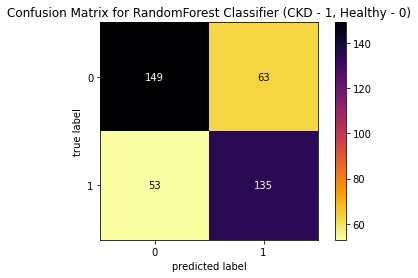

In [226]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for RandomForest Classifier (CKD - 1, Healthy - 0)')
plt.show()

AUC % = 0.7518115942028984


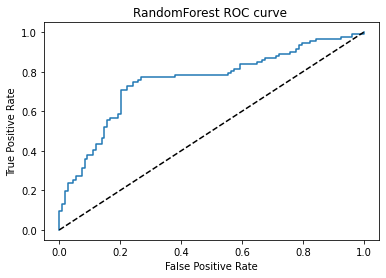

In [164]:
probs = rfg.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve ')
# show the plot
plt.show()

In [227]:
# Initialize GradientBoostingClassifier object
gbc = GradientBoostingClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

In [228]:
# Initialize GridSearchCV object
gscv = GridSearchCV(gbc, param_grid=param_grid, cv=3, n_jobs=4)

# Fit the GridSearchCV object to the training data
gscv.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', gscv.best_params_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 200}


In [229]:
gscv.score(X_train, y_train)

0.716875

In [230]:
gscv.score(X_test, y_test)

0.7125

In [231]:
cm = confusion_matrix(y_test, gscv.predict(X_test))

In [233]:
print(classification_report(y_test, gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       212
           1       0.69      0.72      0.70       188

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



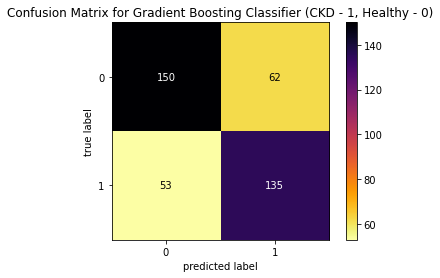

In [234]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for Gradient Boosting Classifier (CKD - 1, Healthy - 0)')
plt.show()

AUC % = 0.720794861501405


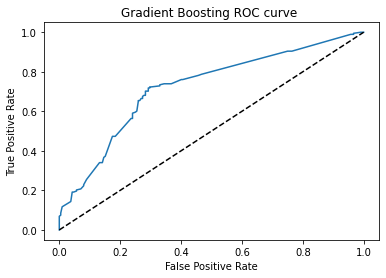

In [235]:
probs = gscv.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC curve ')
# show the plot
plt.show()

In [203]:
lr = LogisticRegression()

In [204]:
lr.fit(X_train, y_train)

LogisticRegression()

In [205]:
lr.score(X_train,y_train)

0.714375

In [206]:
lr.score(X_test, y_test)

0.715

In [207]:
cm = confusion_matrix(y_test, lr.predict(X_test))

In [208]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       212
           1       0.69      0.72      0.70       188

    accuracy                           0.71       400
   macro avg       0.71      0.72      0.71       400
weighted avg       0.72      0.71      0.72       400



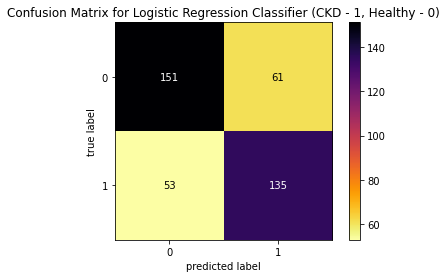

In [209]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for Logistic Regression Classifier (CKD - 1, Healthy - 0)')
plt.show()

AUC % = 0.7532617422721799


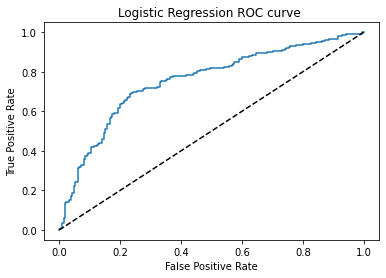

In [210]:
probs = lr.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve ')
# show the plot
plt.show()

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = { 
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Create the DecisionTreeClassifier model
dtc = DecisionTreeClassifier()

# Perform grid search with cross-validation
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=3, verbose=True, n_jobs=4)
CV_dtc.fit(X_train, y_train)

# Get the best model from the grid search
best_model = CV_dtc.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Obtain the decision tree formed
decision_tree = best_model

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [212]:
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [213]:
gscv = GridSearchCV(dtc, param_grid=param_grid, cv=3, n_jobs=4)

# Fit the GridSearchCV object to the training data
gscv.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', gscv.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4}


In [214]:
gscv.score(X_train, y_train)

0.7225

In [215]:
gscv.score(X_test, y_test)

0.6975

In [216]:
cm = confusion_matrix(y_test, gscv.predict(X_test))
print(classification_report(y_test, gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       212
           1       0.67      0.69      0.68       188

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



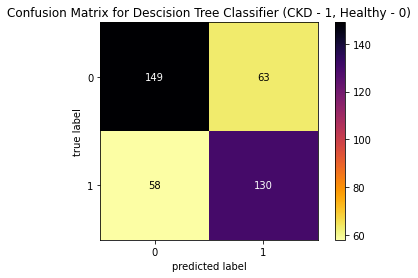

In [217]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for Descision Tree Classifier (CKD - 1, Healthy - 0)')
plt.show()

AUC % = 0.7010989562424728


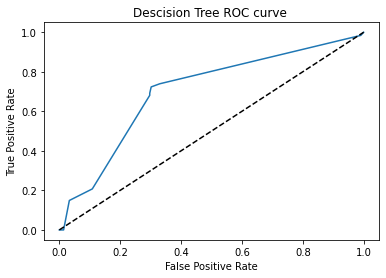

In [218]:
probs = gscv.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Descision Tree ROC curve ')
# show the plot
plt.show()

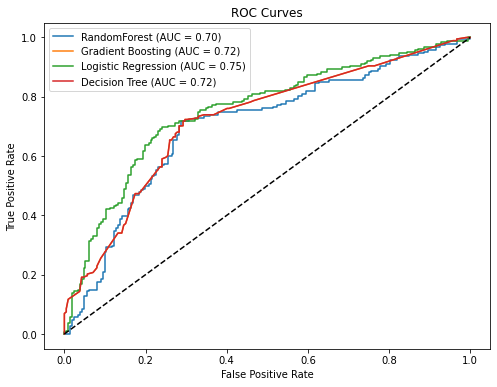

In [240]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot RandomForest ROC curve
probs = rfg.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs)
auc_score = auc(fper, tper)
ax.plot(fper, tper, label='RandomForest (AUC = {:.2f})'.format(auc_score))

# Plot Gradient Boosting ROC curve
probs = gscv.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
auc_score = auc(fper, tper)
ax.plot(fper, tper, label='Gradient Boosting (AUC = {:.2f})'.format(auc_score))

# Plot Logistic Regression ROC curve
probs = lr.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
auc_score = auc(fper, tper)
ax.plot(fper, tper, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))

# Plot Decision Tree ROC curve
probs = gscv.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
auc_score = auc(fper, tper)
ax.plot(fper, tper, label='Decision Tree (AUC = {:.2f})'.format(auc_score))

# Plot the diagonal line
ax.plot([0,1], [0,1], 'k--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')

# Display the legend
ax.legend()

# Show the plot
plt.show()